# Trees in San Francisco 🌳 🌿 🌲

In [ ]:
# import all modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data acquisition 📥

The data was collected from the public dataset on [Google BigQuery](https://console.cloud.google.com/bigquery). The query is below.

```sql
SELECT
  species,
  plant_date,
  plant_type,
  dbh,
  plot_size
FROM
  `bigquery-public-data.san_francisco.street_trees`
WHERE
  dbh IS NOT NULL
  AND dbh <> ''
  AND LENGTH(plot_size) = 3;
```

In [ ]:
trees_df = pd.read_csv('/work/trees_sf_data_viz.csv')
trees_df

,species,plant_date,plant_type,dbh,plot_size
0,Prunus cerasifera :: Cherry Plum,2008-04-21 00:00:00.000000 UTC,Tree,3,3x3
1,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3
2,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3
3,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3
4,Tree(s) ::,2008-04-22 00:00:00.000000 UTC,Tree,3,3x3
...,...,...,...,...,...
38624,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3
38625,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3
38626,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,24,3x3
38627,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,12,4X4


### Schema (from BigQuery)

**species** - Species of tree :: common name

**plant_date** - date tree was planted

**plant_type** - Landscaping or Tree

**dbh** - diameter at breast height

Tree diameter is usually measured at 4.5 feet (ft) above ground level. Measurement at this height is referred to as _diameter at breast height_ or DBH. DBH can be measured with a specially calibrated tape measure called a diameter tape (d-tape) available from most arborist or forestry supply dealers.

**plot_size** - dimension of tree plot

## Data cleaning 🛁

In [ ]:
def calculate_area(plot_size):
    try:
        # Split the plot_size string by 'x' and convert to float
        dimensions = list(map(lambda dimension: float(dimension), plot_size.split('x')))
        # Return the product of the dimensions (area)
        return dimensions[0] * dimensions[1]
    except:
        return None

In [ ]:
trees_df['plot_area'] = trees_df['plot_size'].apply(calculate_area)
trees_df

,species,plant_date,plant_type,dbh,plot_size,plot_area
0,Prunus cerasifera :: Cherry Plum,2008-04-21 00:00:00.000000 UTC,Tree,3,3x3,9.0
1,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0
2,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0
3,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0
4,Tree(s) ::,2008-04-22 00:00:00.000000 UTC,Tree,3,3x3,9.0
...,...,...,...,...,...,...
38624,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0
38625,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0
38626,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,24,3x3,9.0
38627,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,12,4X4,NaN


In [ ]:
trees_df['plot_area'].max()

81.0

In [ ]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38629 entries, 0 to 38628
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   species     38629 non-null  object 
 1   plant_date  20048 non-null  object 
 2   plant_type  38629 non-null  object 
 3   dbh         38629 non-null  int64  
 4   plot_size   38629 non-null  object 
 5   plot_area   22139 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


## Exploratory data visualization 🧭

### Boxplots

Boxplots are effective for exploring original data by summarizing central tendencies and variability, aiding in the quick identification of outliers and providing a clear visual overview of the data's distribution characteristics. Their concise and robust representation makes them a valuable tool for data exploration and comparison across different groups or categories.

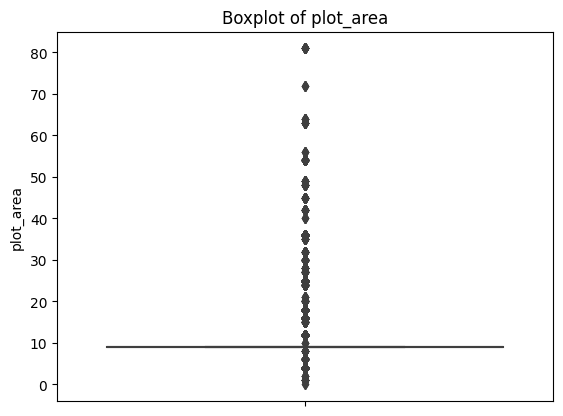

In [ ]:
# Create a boxplot for the 'plot_area' column
sns.boxplot(y=trees_df['plot_area'])
plt.title('Boxplot of plot_area')

# Display the plot
plt.show()

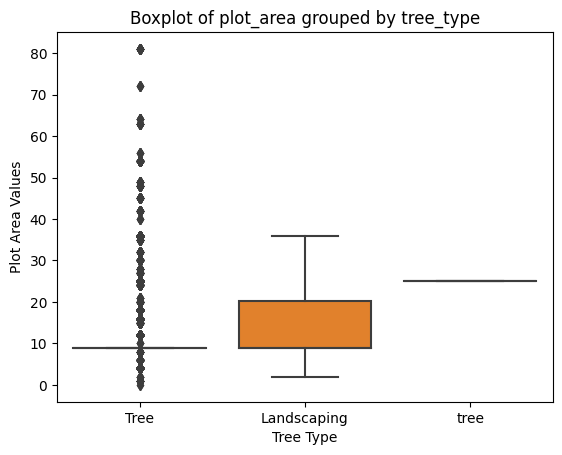

In [ ]:
# Create boxplots for the 'plot_area' column grouped by 'tree_type'
sns.boxplot(x=trees_df['plant_type'], y=trees_df['plot_area'])
plt.title('Boxplot of plot_area grouped by tree_type')
plt.ylabel('Plot Area Values')
plt.xlabel('Tree Type')

# Display the plot
plt.show()

In [ ]:
trees_df['plant_type'] = trees_df['plant_type'].apply(lambda x: x.replace('tree', 'Tree'))

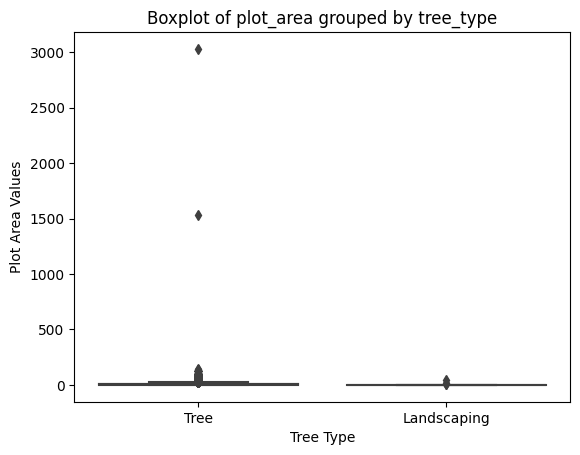

In [ ]:
# Create boxplots for the 'plot_area' column grouped by 'tree_type'
sns.boxplot(x=trees_df['plant_type'], y=trees_df['dbh'])
plt.title('Boxplot of plot_area grouped by tree_type')
plt.ylabel('Plot Area Values')
plt.xlabel('Tree Type')

# Display the plot
plt.show()

In [ ]:
trees_df['dbh'].max()

3030

In [ ]:
# Extract the common name from the 'species' column and create a new column 'common_name'
trees_df['common_name'] = trees_df['species'].str.split(' :: ').str[1]

trees_df.head(3)

,species,plant_date,plant_type,dbh,plot_size,plot_area,common_name
0,Prunus cerasifera :: Cherry Plum,2008-04-21 00:00:00.000000 UTC,Tree,3,3x3,9.0,Cherry Plum
1,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
2,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear


In [ ]:
# Filter the DataFrame to retain rows where 'dbh' is greater than 0 and less than or equal to 1000
filtered_trees_df = trees_df[(trees_df['dbh'] > 0) & (trees_df['dbh'] <= 1000)]
filtered_trees_df

,species,plant_date,plant_type,dbh,plot_size,plot_area,common_name
0,Prunus cerasifera :: Cherry Plum,2008-04-21 00:00:00.000000 UTC,Tree,3,3x3,9.0,Cherry Plum
1,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
2,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
3,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
4,Tree(s) ::,2008-04-22 00:00:00.000000 UTC,Tree,3,3x3,9.0,NaN
...,...,...,...,...,...,...,...
38624,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0,Sycamore: London Plane
38625,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0,Sycamore: London Plane
38626,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,24,3x3,9.0,Sycamore: London Plane
38627,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,12,4X4,NaN,Sycamore: London Plane


In [ ]:
# Remove rows where 'common_name' is NaN
filtered_trees_df = filtered_trees_df.dropna(subset=['common_name'])
filtered_trees_df

,species,plant_date,plant_type,dbh,plot_size,plot_area,common_name
0,Prunus cerasifera :: Cherry Plum,2008-04-21 00:00:00.000000 UTC,Tree,3,3x3,9.0,Cherry Plum
1,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
2,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
3,Pyrus kawakamii :: Evergreen Pear,2008-03-17 00:00:00.000000 UTC,Tree,3,3x3,9.0,Evergreen Pear
5,Acer rubrum :: Red Maple,2008-04-22 00:00:00.000000 UTC,Tree,3,3x3,9.0,Red Maple
...,...,...,...,...,...,...,...
38624,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0,Sycamore: London Plane
38625,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,18,3x3,9.0,Sycamore: London Plane
38626,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,24,3x3,9.0,Sycamore: London Plane
38627,Platanus x hispanica :: Sycamore: London Plane,NaN,Tree,12,4X4,NaN,Sycamore: London Plane


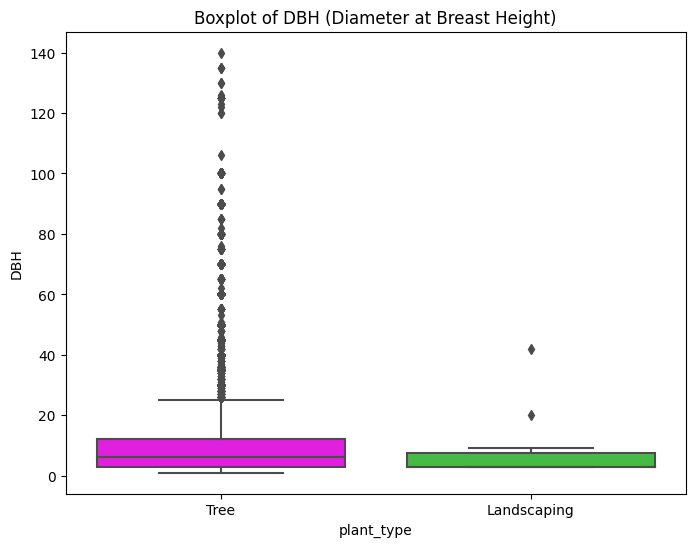

In [ ]:
# Set the color palette
colors = ["fuchsia", "limegreen"]
# Create a boxplot for the 'dbh' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_trees_df, x='plant_type', y='dbh', palette=colors)
plt.title('Boxplot of DBH (Diameter at Breast Height)')
plt.ylabel('DBH')
plt.show()

In [ ]:
# Define the colors
colors = ["darkgreen", "orange"]

# Create a boxplot using Plotly
fig = px.box(filtered_trees_df, x="plant_type", y="dbh", color="plant_type", 
             log_y=True, color_discrete_sequence=colors)

# Update layout and title
fig.update_layout(title="Boxplots of DBH (Diameter at Breast Height) by Plant Type on a Log Scale")

fig.show()


### Histograms

**A histogram** is a graphical representation used to depict the **distribution** of continuous numeric data by dividing the data into bins and counting the number of data points in each bin.

A variable is considered continuous if it can take an infinite number of values within a given range. In the context of the data, the "plot_area" could be considered continuous since it represents the area of a plot, and in theory, this could take on any positive value within the range of feasible plot sizes.

However, in practice and within datasets, continuous variables are often discretized due to measurement constraints or data collection methods. For example, measurements might be rounded to the nearest whole number, or only certain preset values might be used.

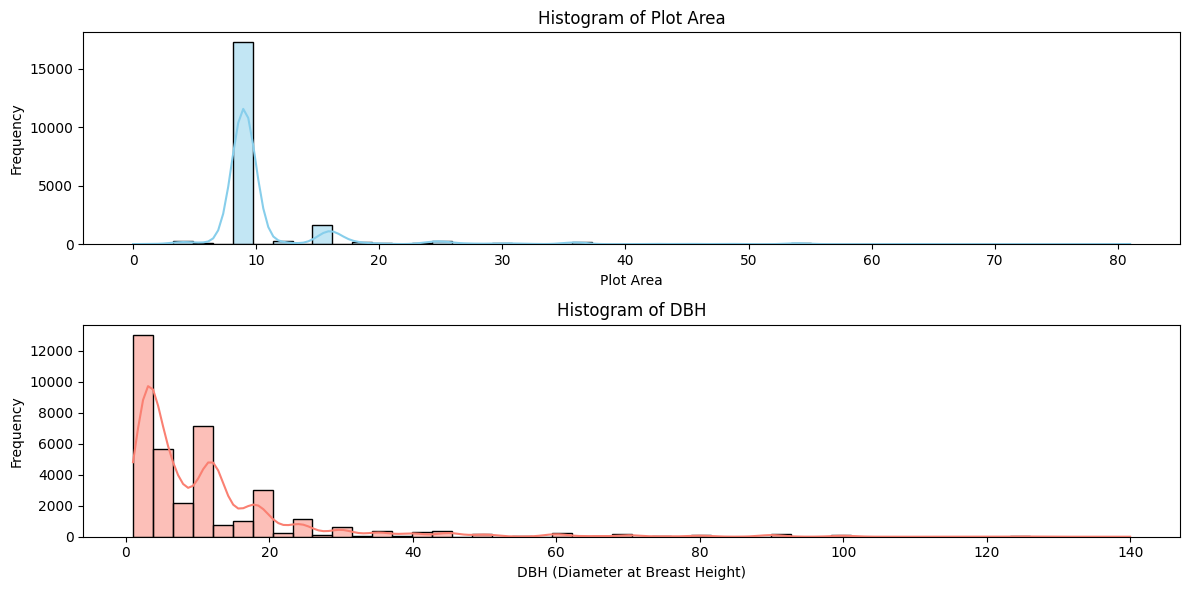

In [ ]:
# Plot histograms for 'plot_area' and 'dbh'

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Histogram for 'plot_area'
sns.histplot(filtered_trees_df['plot_area'], ax=axes[0], color='skyblue', kde=True, bins=50)
axes[0].set_title('Histogram of Plot Area')
axes[0].set_xlabel('Plot Area')
axes[0].set_ylabel('Frequency')

# Histogram for 'dbh'
sns.histplot(filtered_trees_df['dbh'], ax=axes[1], color='salmon', kde=True, bins=50)
axes[1].set_title('Histogram of DBH')
axes[1].set_xlabel('DBH (Diameter at Breast Height)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Assuming you've already loaded your data and applied the necessary filters to create 'filtered_trees_df'
fig = px.histogram(
    filtered_trees_df, 
    x="dbh", 
    nbins=50,  # Increased number of bins
    title="Histogram of DBH",
    color_discrete_sequence=["darkgreen"]
)

fig.show()



## Explanatory data visualisations 🧑‍🏫

### A bar chart

**A bar/column chart** is a graphical representation used to show the frequency or proportion of distinct categories. Unlike histograms, which are used for continuous or large discrete data, bar charts are used for discrete or categorical data. Each category is represented by a separate bar, and the length (or height) of each bar corresponds to the frequency or proportion of that category.

In [ ]:
# Get the top 10 most popular trees based on their frequency in the 'common_name' column
top_10_trees = filtered_trees_df['common_name'].value_counts().head(10)
top_10_trees_sorted = top_10_trees.sort_values(ascending=True)  # Sorted for better visualization in bar chart

top_10_trees_sorted


Laurel Fig                             938
Indian Laurel Fig Tree 'Green Gem'     938
Red Flowering Gum                      956
Southern Magnolia                     1308
Hybrid Strawberry Tree                1311
Victorian Box                         1800
Swamp Myrtle                          2051
New Zealand Xmas Tree                 2099
Brisbane Box                          2909
Sycamore: London Plane                3766
Name: common_name, dtype: int64

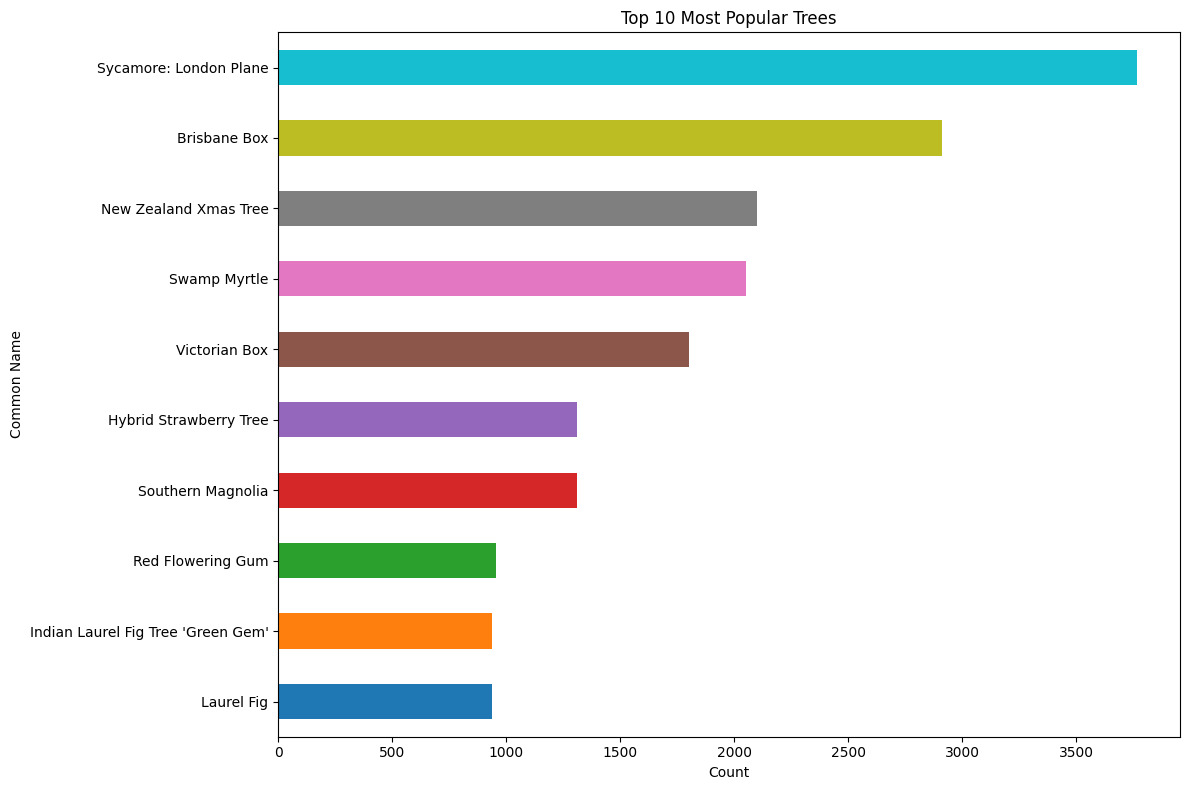

In [ ]:
# Create a bar chart for the top 10 most popular trees with different colors for each bar
colors = sns.color_palette("tab10", len(top_10_trees_sorted))

plt.figure(figsize=(12, 8))
top_10_trees_sorted.plot(kind='barh', color=colors)
plt.title('Top 10 Most Popular Trees')
plt.xlabel('Count')
plt.ylabel('Common Name')
plt.tight_layout()
plt.show()


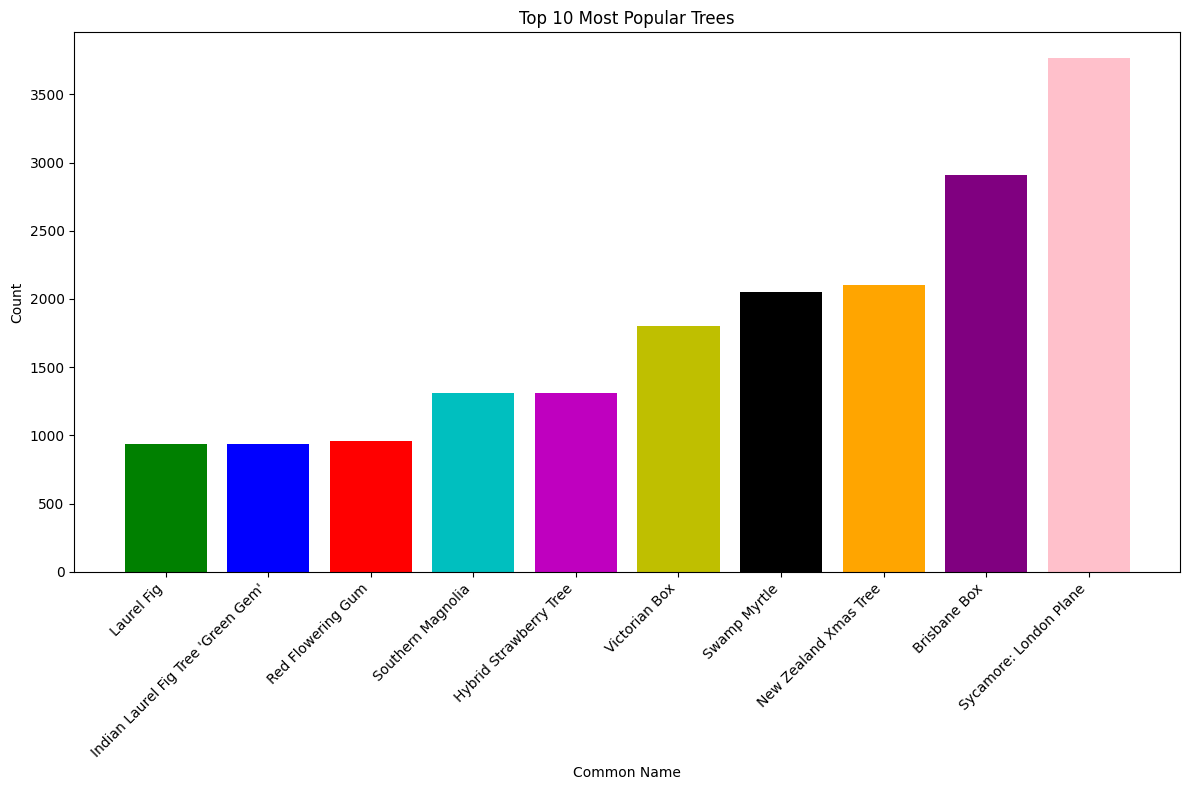

In [ ]:
# Create a column chart (vertical bar chart) for the top 10 most popular trees using Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(top_10_trees_sorted.index, top_10_trees_sorted.values, color=['g', 'b', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink'])
plt.title('Top 10 Most Popular Trees')
plt.ylabel('Count')
plt.xlabel('Common Name')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Time data and line graphs

Line graphs are highly effective visualisation tool for representing time-series data, but do not connect the dots for no reason. 

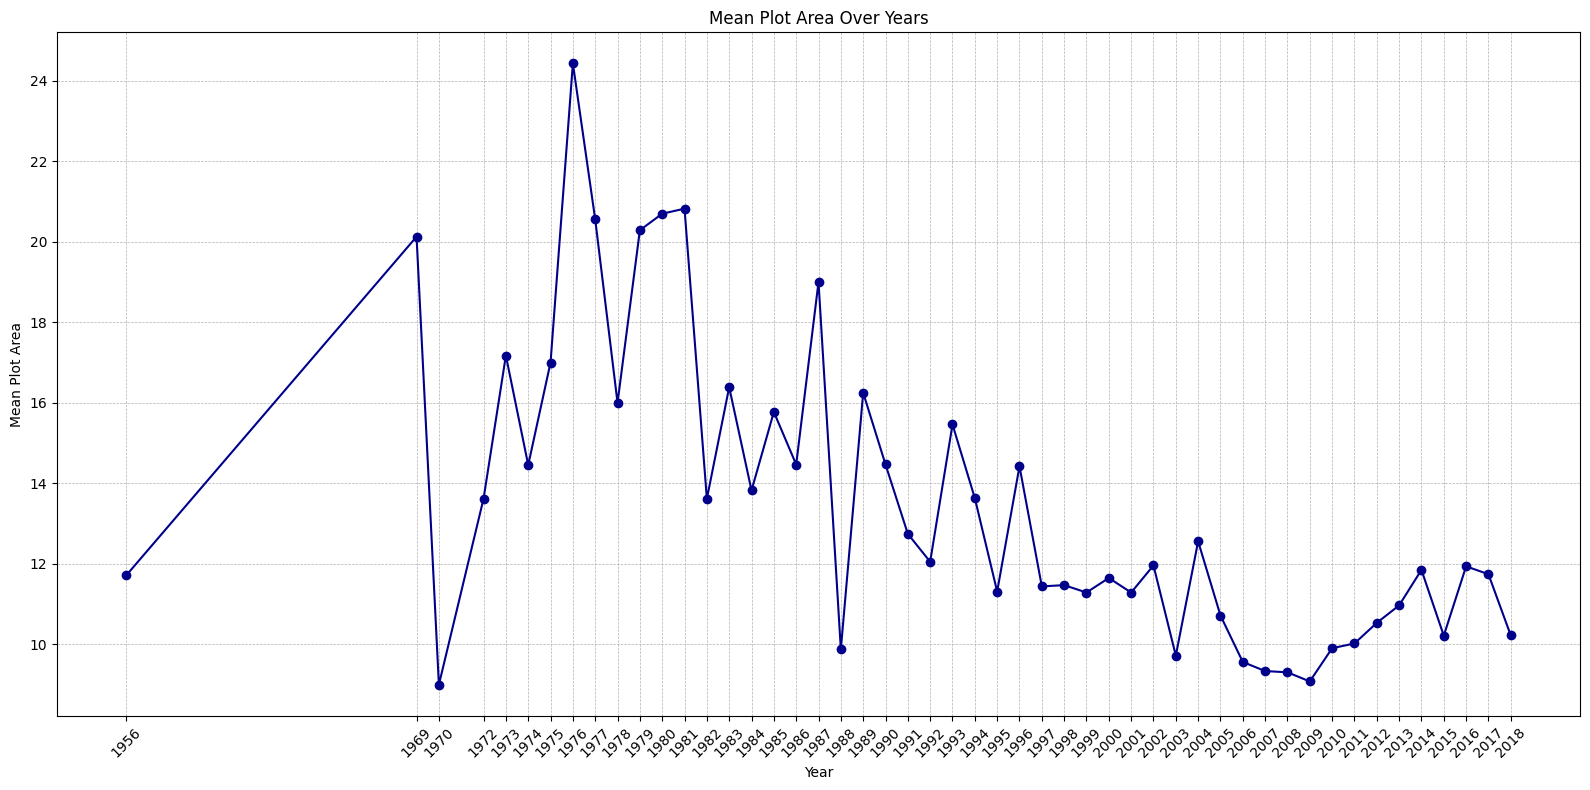

In [ ]:
# Create a copy of the DataFrame
filtered_trees_df = filtered_trees_df.copy()

# Convert 'plant_date' to datetime
filtered_trees_df['plant_date'] = pd.to_datetime(filtered_trees_df['plant_date'])

# Extract the 'year' from the 'plant_date' column and store it in a new column 'year'
filtered_trees_df['year'] = filtered_trees_df['plant_date'].dt.year

# Group data by the 'year' column and compute the mean 'plot_area' for each year
grouped_plot_area_yearly = filtered_trees_df.groupby('year')['plot_area'].mean().reset_index()

# Create the line graph with correct year labels on the x-axis
plt.figure(figsize=(16, 8))
plt.plot(grouped_plot_area_yearly['year'], grouped_plot_area_yearly['plot_area'], color='darkblue', marker='o')
plt.title('Mean Plot Area Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Plot Area')
plt.xticks(grouped_plot_area_yearly['year'], rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### Explaining relationships

In [ ]:
fig = px.scatter(filtered_trees_df, x='plot_area', y='dbh', title='Scatter Plot of DBH vs Plot Area')
fig.show()

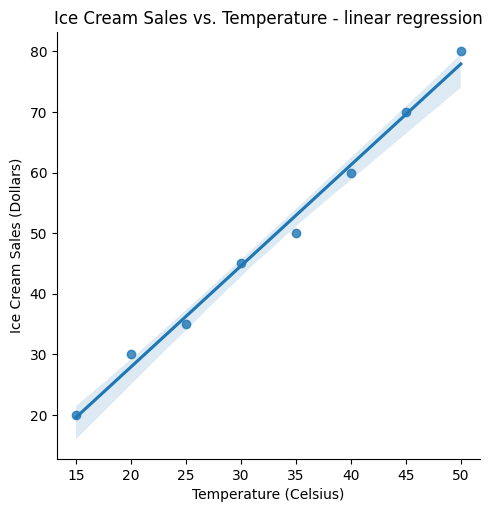

In [ ]:
# Sample data with temperature (in degrees Celsius) and ice cream sales (in dollars)
data = {
    'Temperature (Celsius)': [15, 20, 25, 30, 35, 40, 45, 50],
    'Ice Cream Sales (Dollars)': [20, 30, 35, 45, 50, 60, 70, 80]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a scatterplot with a linear regression line using seaborn
sns.lmplot(x='Temperature (Celsius)', y='Ice Cream Sales (Dollars)', data=df)

# Set plot labels and title
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Ice Cream Sales (Dollars)')
plt.title('Ice Cream Sales vs. Temperature - linear regression')

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f35496f-1fd1-48b6-96cf-5a716231ae8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>